In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from pingouin import pairwise_tukey
from matplotlib.lines import Line2D
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
directory = "../Data/News/"
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
%matplotlib inline
mydpi=600
b=False
s=18

orange, purple, elm, grey ='#FFCC00', '#666599', '#217C7E', '#DCDCDC'

__author__ = 'HK Dambanemuya'
__version__ = 'Python3'

In [2]:
liwc = pd.read_csv("../Results/liwc_results.csv")
liwc = liwc.drop("C", axis=1)
liwc.head()

,A,B,D,E,F,G,Analytic,Clout,Authentic,Tone,affect,posemo,negemo,anx,anger,sad,discrep,tentat,certain,focuspast,focuspresent,focusfuture,work,home,money,death
0,2020-02-15,US defense chief slams China as rising threat to world order,"COVID, medical supplies",news,barnesville-enterprise,US,92.840,80.960,7.440,19.140,7.430,3.420,3.860,1.490,1.630,0.150,1.930,2.080,0.590,3.860,6.690,0.590,4.160,0.450,0.450,0.300
1,2020-02-17,Beijing to build mask factory in 6 days - People's Daily Online,"COVID, medical supplies",news,people,CN,99.000,68.920,17.670,60.880,3.090,2.470,0.620,0.000,0.620,0.000,0.620,0.620,0.620,1.850,4.320,2.470,12.350,0.620,0.000,0.620
2,2020-02-15,Chinese 'novel remedies' for economy evolve as virus outbreak bites,"COVID, medical supplies",news,ecns,CN,98.510,69.460,24.850,31.060,2.600,1.450,1.140,0.210,0.520,0.100,0.420,1.140,0.310,4.050,3.630,0.830,8.720,0.620,2.800,0.930
3,2020-02-17,Photos: Nigerians Trapped In Coronavirus Ground Zero Cry Out,"COVID, medical supplies",news,independent,NG,98.140,60.950,6.770,13.280,2.780,0.930,1.850,0.000,0.930,0.930,0.000,1.850,0.000,0.930,6.480,0.930,5.560,0.000,0.930,1.850
4,2020-02-16,NaN,"COVID, medical supplies",news,yahoo,US,91.820,52.880,30.770,38.570,0.720,0.720,0.000,0.000,0.000,0.000,0.000,2.160,0.720,2.880,9.350,0.000,3.600,0.000,1.440,0.000


In [3]:
sources = ['news', 'blogs', 'discussions']
time_orientation = ['focuspast', 'focuspresent', 'focusfuture']
cognitive_processes = ['certain', 'tentat', 'discrep']
dates = sorted(set(liwc['A']))

In [4]:
def get_mean_std(dimensions):
    for source in sources:
        for measure in dimensions:
            print (source, 
                   measure, 
                   round(liwc[liwc['E']==source][measure].mean(), 2), 
                   '({})'.format(round(liwc[liwc['E']==source][measure].std(), 2)))


In [5]:
def get_anova_tukey_results(dimensions):
    for measure in dimensions:
        anova_df = pd.concat([liwc[liwc['E']=='news'][['E',measure]].reset_index(),
                             liwc[liwc['E']=='blogs'][['E',measure]].reset_index(),
                             liwc[liwc['E']=='discussions'][['E',measure]].reset_index()])
        anova_df.columns = ['index', 'treatments', 'value']   

        # Ordinary Least Squares (OLS) model
        model = ols('value ~ C(treatments)', data=anova_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print ('\n',measure)
        print ("===================================")
        print (anova_table)
        print ('\n')
        # perform multiple pairwise comparison (Tukey HSD)
        # for unbalanced (unequal sample size) data, pairwise_tukey uses Tukey-Kramer test
        m_comp = pairwise_tukey(data=anova_df, dv='value', between='treatments')
        m_comp.columns = ['group1', 'group2', 'mean(group1)', 'mean(group2)', 'diff', 'se', 'T', 'p-tukey', 'hedges' ]
        print (m_comp)

## Cognitive Processes

In [6]:
get_mean_std(cognitive_processes)

news certain 1.06 (0.64)
news tentat 1.93 (1.07)
news discrep 1.08 (0.71)
blogs certain 1.16 (0.69)
blogs tentat 2.13 (1.19)
blogs discrep 1.13 (0.73)
discussions certain 1.39 (0.95)
discussions tentat 2.83 (1.61)
discussions discrep 1.49 (1.09)


In [7]:
get_anova_tukey_results(cognitive_processes)


 certain
                  sum_sq          df         F  PR(>F)
C(treatments) 9662.619   2.000       10405.105 0.000  
Residual      521196.205 1122491.000 nan       nan    


        group1       group2  mean(group1)  mean(group2)   diff    se       T  p-tukey  hedges
0  blogs        discussions 1.161         1.388         -0.227 0.003 -86.114 0.001    -0.333 
1  blogs        news        1.161         1.057         0.105  0.002 69.684  0.001    0.154  
2  discussions  news        1.388         1.057         0.332  0.002 136.273 0.001    0.487  

 tentat
                   sum_sq          df         F  PR(>F)
C(treatments) 66306.362   2.000       25058.578 0.000  
Residual      1485086.189 1122491.000 nan       nan    


        group1       group2  mean(group1)  mean(group2)   diff    se        T  p-tukey  hedges
0  blogs        discussions 2.133         2.827         -0.695 0.004 -156.247 0.001    -0.604 
1  blogs        news        2.133         1.927         0.206  0.003 81.226   

## Time Orientation

In [8]:
get_mean_std(time_orientation)

news focuspast 3.34 (1.67)
news focuspresent 7.6 (2.57)
news focusfuture 1.17 (0.76)
blogs focuspast 2.92 (1.68)
blogs focuspresent 8.13 (2.8)
blogs focusfuture 1.22 (0.8)
discussions focuspast 3.1 (2.08)
discussions focuspresent 9.98 (3.42)
discussions focusfuture 1.36 (1.07)


In [9]:
get_anova_tukey_results(time_orientation)


 focuspast
                   sum_sq          df        F  PR(>F)
C(treatments) 37894.498   2.000       6506.658 0.000  
Residual      3268669.700 1122491.000 nan      nan    


        group1       group2  mean(group1)  mean(group2)   diff    se        T  p-tukey  hedges
0  blogs        discussions 2.915         3.102         -0.187 0.007 -28.325  0.001    -0.110 
1  blogs        news        2.915         3.338         -0.423 0.004 -112.313 0.001    -0.248 
2  discussions  news        3.102         3.338         -0.236 0.006 -38.678  0.001    -0.138 

 focuspresent
                   sum_sq          df         F  PR(>F)
C(treatments) 462421.354  2.000       31511.870 0.000  
Residual      8236004.522 1122491.000 nan       nan    


        group1       group2  mean(group1)  mean(group2)   diff    se        T  p-tukey  hedges
0  blogs        discussions 8.132         9.977         -1.845 0.010 -176.183 0.001    -0.681 
1  blogs        news        8.132         7.596         0.536  0.0

## Analysis by Time

In [10]:
def get_daily_measure_scores(measure):
    news = liwc[liwc['E']=='news']
    blogs = liwc[liwc['E']=='blogs']
    discussions = liwc[liwc['E']=='discussions']
                
    news_daily, blogs_daily, discussions_daily = [], [], []
    for date in tqdm_notebook(dates):
        news_daily.append(news[news['A'] == date][measure].mean())
        blogs_daily.append(blogs[blogs['A'] == date][measure].mean())
        discussions_daily.append(discussions[discussions['A'] == date][measure].mean())
        
    news_df, blogs_df, discussions_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    news_df['index'], blogs_df['index'], discussions_df['index'] = range(0,len(news_daily)), range(0,len(blogs_daily)), range(0,len(discussions_daily))
    news_df['treatments'], blogs_df['treatments'], discussions_df['treatments'] = ['news']*len(news_daily), ['blogs']*len(blogs_daily), ['discussions']*len(discussions_daily)
    news_df['value'], blogs_df['value'], discussions_df['value'] = news_daily, blogs_daily, discussions_daily
    return [news_df.fillna(0), blogs_df.fillna(0), discussions_df.fillna(0)]

In [11]:
def get_anova_tukey_results_daily_aggregate(dimensions):
    for measure in dimensions:
        anova_df = pd.concat(get_daily_measure_scores(measure))
        anova_df.columns = ['index', 'treatments', 'value']   

        # Ordinary Least Squares (OLS) model
        model = ols('value ~ C(treatments)', data=anova_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print ('\n',measure)
        print ("===================================")
        print (anova_table)
        print ('\n')
        # perform multiple pairwise comparison (Tukey HSD)
        # for unbalanced (unequal sample size) data, pairwise_tukey uses Tukey-Kramer test
        m_comp = pairwise_tukey(data=anova_df, dv='value', between='treatments')
        m_comp.columns = ['group1', 'group2', 'mean(group1)', 'mean(group2)', 'diff', 'se', 'T', 'p-tukey', 'hedges' ]
        print (m_comp)




### Cognitive Processes

In [12]:
get_anova_tukey_results_daily_aggregate(cognitive_processes)



 certain
               sum_sq      df     F  PR(>F)
C(treatments) 2.002   2.000   5.387 0.005  
Residual      64.658  348.000 nan   nan    


        group1       group2  mean(group1)  mean(group2)   diff    se      T  p-tukey  hedges
0  blogs        discussions 0.876         0.888         -0.011 0.056 -0.201 0.900    -0.026 
1  blogs        news        0.876         0.722         0.154  0.056 2.737  0.017    0.357  
2  discussions  news        0.888         0.722         0.166  0.056 2.938  0.009    0.383  




 tentat
               sum_sq      df     F  PR(>F)
C(treatments) 12.459  2.000   6.844 0.001  
Residual      316.770 348.000 nan   nan    


        group1       group2  mean(group1)  mean(group2)  diff    se     T  p-tukey  hedges
0  blogs        discussions 2.135         2.015         0.120 0.125 0.959 0.656    0.125  
1  blogs        news        2.135         1.689         0.446 0.125 3.574 0.001    0.466  
2  discussions  news        2.015         1.689         0.326 0.125 2.615 0.024    0.341  




 discrep
               sum_sq      df     F  PR(>F)
C(treatments) 2.817   2.000   6.186 0.002  
Residual      79.231  348.000 nan   nan    


        group1       group2  mean(group1)  mean(group2)   diff    se      T  p-tukey  hedges
0  blogs        discussions 0.913         0.950         -0.037 0.062 -0.595 0.837    -0.077 
1  blogs        news        0.913         0.744         0.169  0.062 2.705  0.019    0.353  
2  discussions  news        0.950         0.744         0.206  0.062 3.300  0.003    0.430  


### Time Orientation

In [13]:
get_anova_tukey_results_daily_aggregate(time_orientation)



 focuspast
               sum_sq      df      F  PR(>F)
C(treatments) 46.083  2.000   10.519 0.000  
Residual      762.274 348.000 nan    nan    


        group1       group2  mean(group1)  mean(group2)   diff    se      T  p-tukey  hedges
0  blogs        discussions 2.893         2.502         0.391  0.194 2.019  0.108    0.263  
1  blogs        news        2.893         3.388         -0.495 0.194 -2.557 0.029    -0.333 
2  discussions  news        2.502         3.388         -0.886 0.194 -4.576 0.001    -0.596 




 focuspresent
                sum_sq      df     F  PR(>F)
C(treatments) 68.658   2.000   3.705 0.026  
Residual      3224.700 348.000 nan   nan    


        group1       group2  mean(group1)  mean(group2)  diff    se     T  p-tukey  hedges
0  blogs        discussions 7.012         6.727         0.285 0.398 0.715 0.787    0.093  
1  blogs        news        7.012         5.964         1.048 0.398 2.632 0.023    0.343  
2  discussions  news        6.727         5.964         0.763 0.398 1.917 0.134    0.250  




 focusfuture
               sum_sq      df     F  PR(>F)
C(treatments) 0.372   2.000   0.882 0.415  
Residual      73.372  348.000 nan   nan    


        group1       group2  mean(group1)  mean(group2)  diff    se     T  p-tukey  hedges
0  blogs        discussions 0.933         0.889         0.044 0.060 0.729 0.781    0.095  
1  blogs        news        0.933         0.853         0.080 0.060 1.326 0.382    0.173  
2  discussions  news        0.889         0.853         0.036 0.060 0.596 0.837    0.078  


## Daily Measure Trends

In [14]:
def plot_daily_measure_trends(dimensions):
    
    labels = ['Certain', 'Tentative', 'Discrepency',
              'Past Focus', 'Present Focus', 'Future Focus']
    
    fig = plt.figure(figsize=(12,6), dpi=600)

    for i, measure in tqdm_notebook(enumerate(dimensions)):
        n, b, d = get_daily_measure_scores(measure)
        
        ax = plt.subplot(2, 3, i+1)
        ax.plot(n.rolling(7, on='index').mean()['value'], color=elm)
        ax.plot(b.rolling(7, on='index').mean()['value'], color=orange)
        ax.plot(d.rolling(7, on='index').mean()['value'], color=purple)
        plt.xticks(fontsize=s)
        plt.yticks(fontsize=s)
        ax.set_xlabel(labels[i], fontsize=s)
        ax.set_ylabel('Daily Mean', fontsize=s)

    plt.tight_layout()
    plt.show()

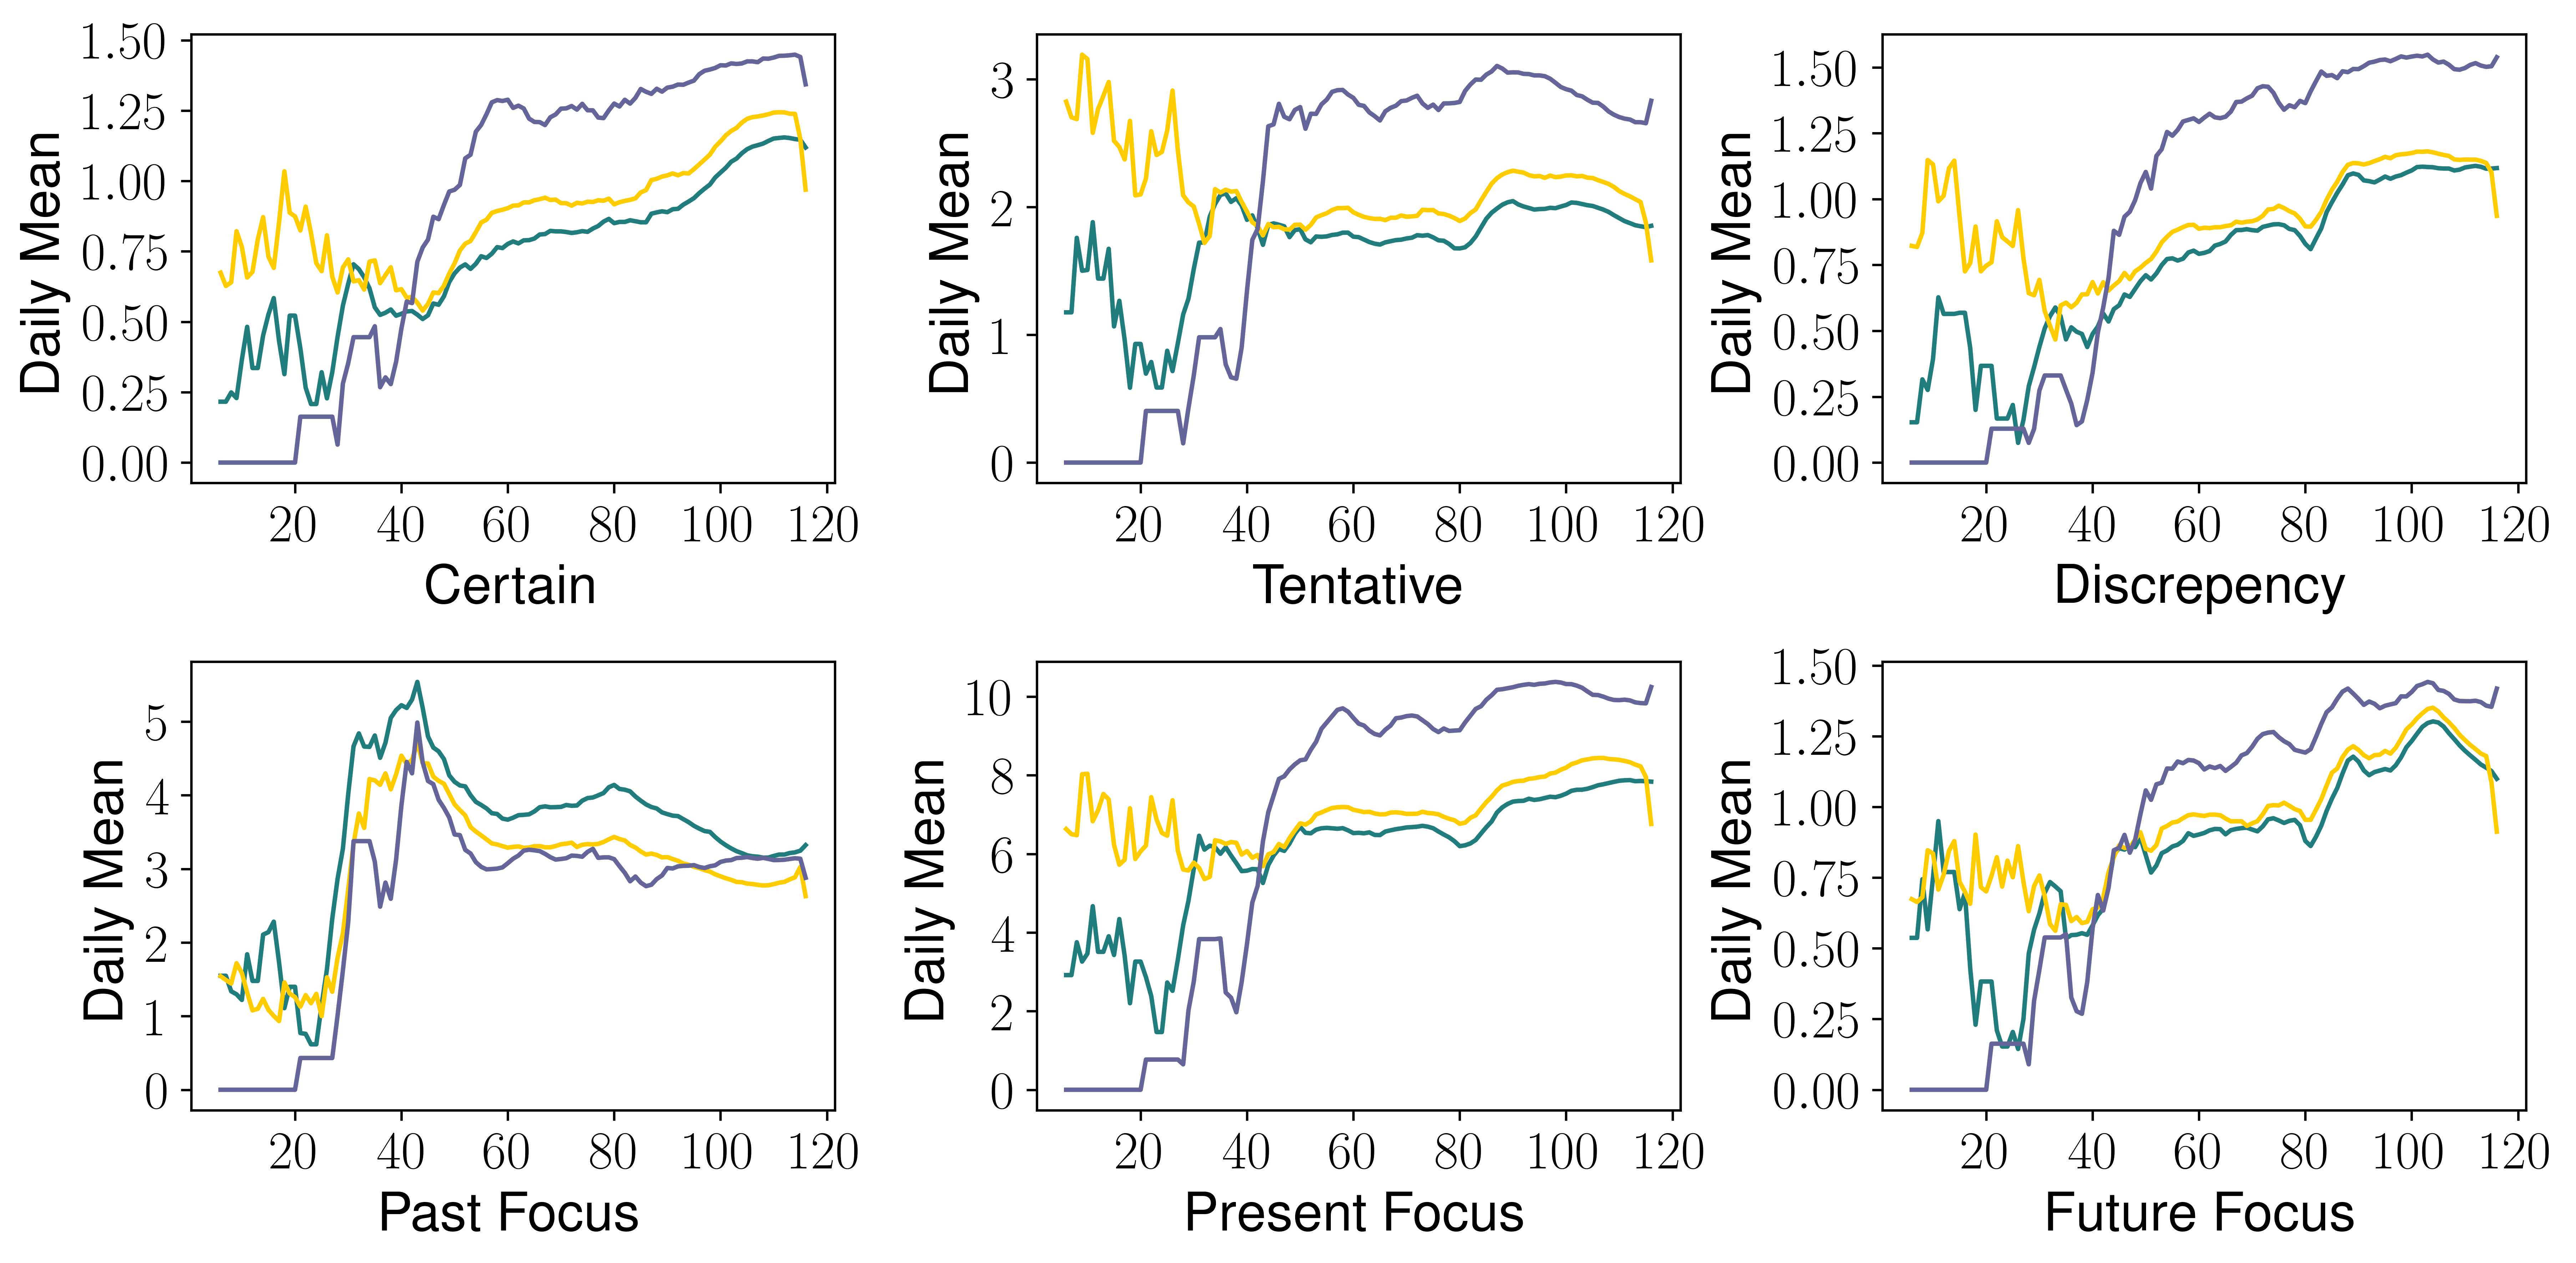

In [15]:
plot_daily_measure_trends(cognitive_processes+time_orientation)